# Notebook to generate common and frequent terms

In [10]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

### Data

In [5]:
# read processed text from previous
full_text = pd.read_pickle('../../data/full_data_w_processedtext.pkl')
processed_text = full_text['processed_text'] 
# only working with the this particular column moving forward
sentences = [x for x in processed_text]

In [8]:
all_text_tokens = [item for sublist in sentences for item in sublist]

token_counts = Counter(all_text_tokens)
top_20_tokens = token_counts.most_common(20)
# print([x for x,y in top_20_tokens])

bigram_trigram_tokens = [token for token in all_text_tokens if "_" in token]
multi_token_counts = Counter(bigram_trigram_tokens)
top_20_multi_tokens = multi_token_counts.most_common(20)
# print([x for x,y in top_20_multi_tokens])

In [15]:
# set keyterms
KEYTERMS = ['health', 'doctor', 'resource', 'class', 
            'race', 'black', 'white', 'bame', 'minority', 
            'racism', 'disadvantaged',
            'discrimination', 'wealth', 'poverty', 'power', 'bias', 'structural']

### Lollipop graphs

In [12]:
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def lolli_graph(tuple_tokens_list, 
                ax,
                title='Most common words in the corpus',
                line_color='skyblue',
                point_color='steelblue'
               ):
    top_20_tokens_sorted = sorted(tuple_tokens_list, key=lambda x: x[1])
    top_20_words, top_20_counts = zip(*top_20_tokens_sorted)
    ax.hlines(y=top_20_words, 
               xmin=0, xmax=top_20_counts, color=line_color, linewidth=3)
    ax.plot(top_20_counts, top_20_words, "o", color=point_color)

    # ax.ylabel('Words', fontsize=14)
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_title(title, fontsize=16)

    # plt.show()

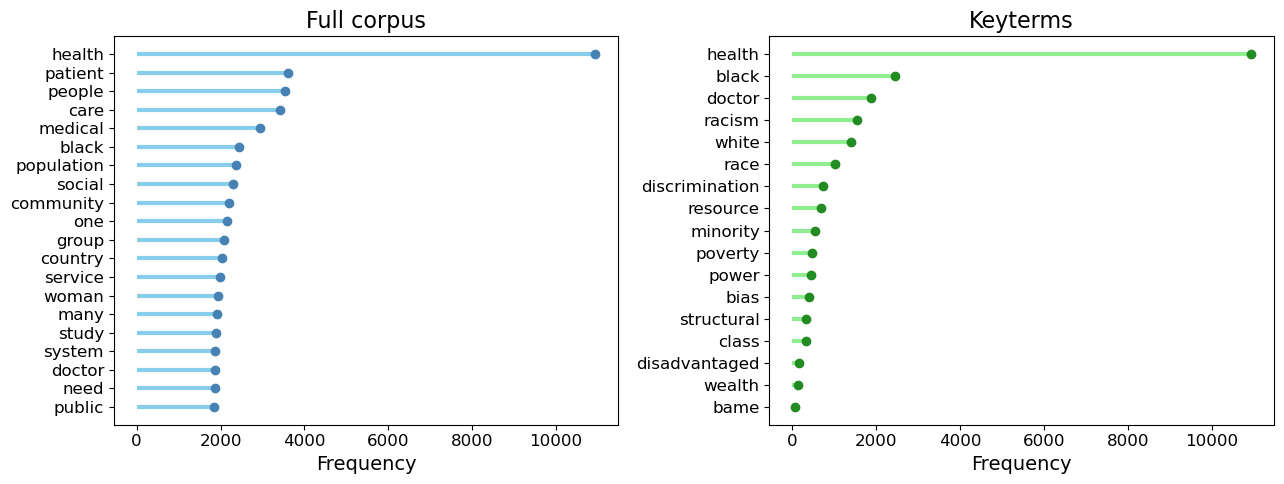

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), layout="tight")

lolli_graph(top_20_tokens, ax1, title="Full corpus")

keyterm_count_tokens = [(key, token_counts[key]) for key in KEYTERMS]
lolli_graph(keyterm_count_tokens, ax2,
            title='Keyterms',
            line_color='lightgreen', point_color='forestgreen')

# plt.savefig('../../results/figures/term_frequency.png')